# Background

* All the files you require will be in the Zipped folder which you will be able to download from the provided link during the test. 

* You have been provided with the file sales_labour_costs.csv containing weekly sales and labour costs, and product count by department for grocery stores of a US retailer. The file store_characteristics.csv contains some additional information regarding the stores. 

* The tables follow a structure of a mostly normalised relational database of the form we often encounter in client situation. A data dictionary is provided in the appendix. 
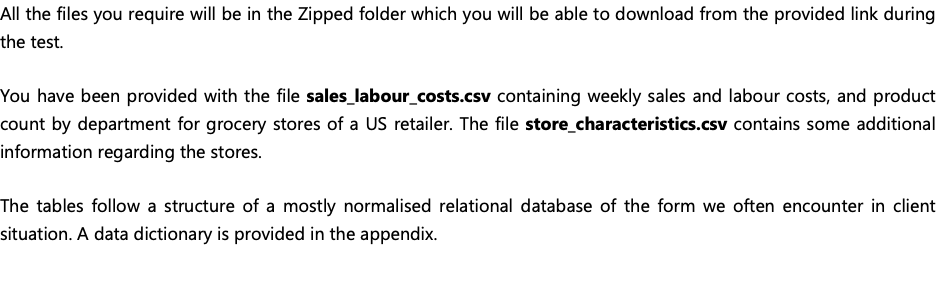

## Import relevant librairies

In [115]:
import pandas as pd
import numpy as np

# 1)	Please load the 2 given files into R / Python (sales_labour_cost.csv, store_characteristics.csv). How many columns does the sales_labour_cost.csv data have?

In [116]:
sales = pd.read_csv('sales_labour_cost.csv')
store = pd.read_csv('store_characteristics.csv')

In [117]:
sales.shape

(487200, 10)

In [118]:
sales.head()

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448


## Sales_labour_cost has 10 columns
---

# 2)	How many more store id’s are there in the sales_labour_cost.csv compared to the store_characteristics.csv? 

In [119]:
store.size

1696

In [120]:
store.columns

Index(['Store_Number', 'State', 'Banner', 'Selling_Area_Sqft'], dtype='object')

In [121]:
store.head()

,Store_Number,State,Banner,Selling_Area_Sqft
0,1,FL,A,35215.0
1,2,FL,A,30793.0
2,3,NaN,A,32066.0
3,4,FL,A,31736.0
4,5,FL,A,33958.0


* Using Store_Number as the store id for both datasets

In [122]:
# Count number of store ids
sales['Store_Number'].count()

487200

In [123]:
# Count number of unique store ids
sales['Store_Number'].nunique()

464

In [125]:
store['Store_Number'].nunique()

424

In [126]:
# get the absolute difference between the number of store ids
difference_absolute = sales['Store_Number'].count() - store['Store_Number'].count()
difference_unique = sales['Store_Number'].nunique() - store['Store_Number'].nunique()
print('Difference in number of IDs: ',difference_absolute)
print('Difference in Unique IDs:', difference_unique)

Difference in number of IDs:  486776
Difference in Unique IDs: 40


* 486776 more
* 40 more (unique)

---
# 3)	What is the oldest date in sales_labour_cost.csv?

In [127]:
sales.head()

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448


In [128]:
sales['Week_Beginning'].dtype

dtype('O')

In [129]:
# convert to datetime first
sales['Week_Beginning'] = pd.to_datetime(sales['Week_Beginning'])

In [130]:
# Oldest date - minimum value of datetime
sales['Week_Beginning'].min()

Timestamp('2019-12-30 00:00:00')

In [131]:
# Sanity check : make sure it is less than max value
sales['Week_Beginning'].max()

Timestamp('2021-05-31 00:00:00')

In [132]:
sales.sort_values(by='Week_Beginning',ascending=True).head()

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.8,18243,0.085350,0.246156
376960,360,11,FY20,1,2019-12-30,0.00,0.0,0,0.084750,0.084652
376961,360,12,FY20,1,2019-12-30,-23.88,0.0,0,0.546781,0.974515
376962,360,13,FY20,1,2019-12-30,0.00,0.0,0,0.412855,0.833913
376963,360,14,FY20,1,2019-12-30,-228.60,0.0,0,0.440663,0.201910


* Oldest date is 2019-12-30 , 30th December 2019

---
# 4)	This question involves cleansing the State column in store_characteristics.csv

## a)	Using store_characteristics.csv, how many stores don’t have any State information in store_characteristics.csv? (i.e. the State value is NA)

In [133]:
store.head()

,Store_Number,State,Banner,Selling_Area_Sqft
0,1,FL,A,35215.0
1,2,FL,A,30793.0
2,3,NaN,A,32066.0
3,4,FL,A,31736.0
4,5,FL,A,33958.0


In [134]:
store['State'].isna().sum()

10

### a) 10 stores



## b)	How many stores does the State with the most stores have? (Hint: the capitalisation of the State values isn’t consistent)


In [135]:
store['State'].value_counts()

FL    313
AL     39
LA     29
GA     25
MS      6
Fl      2
Name: State, dtype: int64

In [136]:
# check dtype
store['State'].dtype

dtype('O')

In [137]:
# Make all uppercase/ standardize capitalisation and get value count
store['State'].str.upper().value_counts()

FL    315
AL     39
LA     29
GA     25
MS      6
Name: State, dtype: int64

### b) the state with the most stores is FL (florida) with 315 stores

## c)	For stores that have no State, replace the State with the most common State value given in a). What is the average Selling Area for stores in the most common State (including the stores whose values have been updated to this State)?


In [138]:
# replace all NaN values with FL
store['State'] = store['State'].replace(np.NaN,'FL')

In [139]:
store['State']

0      FL
1      FL
2      FL
3      FL
4      FL
       ..
419    FL
420    FL
421    FL
422    FL
423    MS
Name: State, Length: 424, dtype: object

In [140]:
store['State'].value_counts()

FL    323
AL     39
LA     29
GA     25
MS      6
Fl      2
Name: State, dtype: int64

In [141]:
store.head()

,Store_Number,State,Banner,Selling_Area_Sqft
0,1,FL,A,35215.0
1,2,FL,A,30793.0
2,3,FL,A,32066.0
3,4,FL,A,31736.0
4,5,FL,A,33958.0


In [142]:
store.groupby('State')['Selling_Area_Sqft'].mean()['FL']

State
AL    33252.205128
FL    32133.654180
Fl    33359.500000
GA    27129.320000
LA    38904.344828
MS    35073.333333
Name: Selling_Area_Sqft, dtype: float64

In [293]:
store.groupby('State')['Selling_Area_Sqft'].mean()['FL'].round()

32134.0

### c) average Selling Area for stores in the most common State: FL- 32133.654180

---
# 5)	How many rows in sales_labour_cost.csv have either zero sales or zero labour costs?

In [143]:
sales

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448
...,...,...,...,...,...,...,...,...,...,...
487195,464,10,FY21,22,2021-05-31,0.00,0.00,0,0.010259,0.887866
487196,464,11,FY21,22,2021-05-31,0.00,0.00,0,0.205551,0.867959
487197,464,12,FY21,22,2021-05-31,0.00,0.00,0,0.634269,0.406731
487198,464,13,FY21,22,2021-05-31,0.00,0.00,0,0.738306,0.589278


In [145]:
(sales[['Sales','Labour_Cost']] == 0).sum()

Sales          248845
Labour_Cost    266665
dtype: int64

In [91]:
sales['Labour_Cost'].value_counts()

0.00       266665
3500.00        75
2969.61        70
2699.97        69
354.97         56
            ...  
5513.79         1
4348.79         1
1563.93         1
4121.28         1
6121.37         1
Name: Labour_Cost, Length: 179202, dtype: int64

In [146]:
sales['Sales'].value_counts()

 0.00        248845
-10.00          548
-1.00           472
-20.00          430
-30.00          426
              ...  
 11306.22         1
 23149.78         1
 99180.16         1
 38788.69         1
-1497.84          1
Name: Sales, Length: 201023, dtype: int64

* 266665 have at least 1 0

In [153]:
#sales[['Sales','Labour_Cost']] == (0,0)
(sales[['Sales','Labour_Cost']] == 0).any().sum()

2

In [155]:
sales[['Sales','Labour_Cost']].all().sum()

0

In [157]:
number =0 
for i in range(len(sales)):
    if(sales['Sales'][i]==0 or sales['Labour_Cost'][i]==0):
        number+=1

In [158]:
number

331536

### c) 331536

---
# 6)	This question involves cleansing the Department column in sales_labour_cost.csv

## a)	How many departments in sales.csv have no or negative sales AND no or negative labour costs? (aggregating across all weeks and stores)


In [159]:
sales.head()

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448


In [170]:
sales['Department']

0          1
1          2
2          3
3          4
4          5
          ..
487195    10
487196    11
487197    12
487198    13
487199    14
Name: Department, Length: 487200, dtype: int64

In [171]:
sales.groupby(by='Department')[['Sales','Labour_Cost']].min()

,Sales,Labour_Cost
Department,,
1,0.00,-11896.77
2,0.00,-185.40
3,0.00,0.00
4,0.00,0.00
5,0.00,-99.91
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,0.00,-4569.52


In [186]:
negative_table = sales.groupby(by='Department')[['Sales','Labour_Cost']].min()

In [194]:
# get the department numbers
negative_table[negative_table>=0].dropna().index

Int64Index([3, 4, 6, 7, 8, 11, 13], dtype='int64', name='Department')

In [429]:
len(negative_table[negative_table>=0].dropna().index)

7

In [174]:
sales.groupby(by='Department')[['Sales','Labour_Cost']].min().value_counts()

Sales      Labour_Cost
 0.00       0.00          7
-24143.43   0.00          1
-3085.00    0.00          1
-2745.99    0.00          1
 0.00      -11896.77      1
           -4569.52       1
           -185.40        1
           -99.91         1
dtype: int64

* Using the minimum function, we can determine if any negative numbers exist
* We can see that there are 7 that meet the criteria

## b)	Filter out these departments from the sales dataset (all rows of data for the stores, not just the weeks that don’t have any sales). What is the average weekly department sales value in this filtered sales dataset?
* the departments 
3,4,6,7,8,11,13

In [195]:
positive_stores = negative_table[negative_table>=0].dropna().index

In [175]:
sales.groupby(by='Department')[['Sales','Labour_Cost']].min().value_counts()

Labour_Cost
 0.00        7
-11896.77    1
-4569.52     1
-185.40      1
-99.91       1
dtype: int64

In [199]:
positive_sales = sales[sales['Department'].isin(positive_stores)]
positive_sales

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
5,1,6,FY20,1,2019-12-30,0.00,0.00,0,0.030921,0.452927
6,1,7,FY20,1,2019-12-30,0.00,7184.21,0,0.867713,0.500914
7,1,8,FY20,1,2019-12-30,0.00,0.00,0,0.258335,0.996958
...,...,...,...,...,...,...,...,...,...,...
487191,464,6,FY21,22,2021-05-31,0.00,0.00,0,0.450151,0.997547
487192,464,7,FY21,22,2021-05-31,0.00,0.00,0,0.769478,0.737459
487193,464,8,FY21,22,2021-05-31,0.00,0.00,0,0.971734,0.079710
487196,464,11,FY21,22,2021-05-31,0.00,0.00,0,0.205551,0.867959


In [201]:
# sanity check, make sure departments are correct
positive_sales['Department'].value_counts()

3     34800
4     34800
6     34800
7     34800
8     34800
11    34800
13    34800
Name: Department, dtype: int64

## What is the average weekly department sales value in this filtered sales dataset?

In [205]:
positive_sales.groupby(by=['Department'])['Sales'].mean()

Department
3     59028.972514
4     18007.649650
6         0.000000
7         0.000000
8         0.000000
11        0.000000
13        0.000000
Name: Sales, dtype: float64

In [212]:
positive_sales['Fiscal_Week'].nunique()

53

In [223]:
department_sales = (positive_sales.groupby(by=['Department'])['Sales'].sum()/53).apply(lambda x: '%.5f' % x)
department_sales

Department
3     38758646.10340
4     11823890.71340
6            0.00000
7            0.00000
8            0.00000
11           0.00000
13           0.00000
Name: Sales, dtype: object

In [243]:
department_sales = pd.to_numeric(department_sales)
department_sales.mean()

7226076.6881142855

In [291]:
department_sales.mean().round()

7226077.0

## average: 7226076.6881142855


7)	Run the code below to load the cleansed store characteristics and sales and labour cost files. (update the file path if needed). 

* Group sales_labour_cost_cleansed so that the data is at store-week level, rather than store-department-week level.
* Combine the sales and labour costs and store characteristics datasets, so that the rows from sales and labour costs are appended with new information from store characteristics dataset. 

In [244]:
store_characteristics_cleansed = pd.read_csv("store_characteristics_cleansed.csv")
sales_labour_cost_cleansed = pd.read_csv("sales_labour_cost_cleansed.csv")

In [245]:
sales_labour_cost_cleansed.head(10)

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448
5,1,1,FY20,2,2020-01-06,193471.25,5611.59,18243,0.625955,0.890270
6,1,2,FY20,2,2020-01-06,61496.25,967.22,3099,0.474308,0.499537
7,1,3,FY20,2,2020-01-06,65618.45,4157.17,972,0.433564,0.416718
8,1,4,FY20,2,2020-01-06,27879.18,7367.81,1264,0.843654,0.799536
9,1,5,FY20,2,2020-01-06,48133.81,3473.36,1269,0.480305,0.710787


In [267]:
# exclude where number of products =0
sales_labour_cost_cleansed = sales_labour_cost_cleansed[sales_labour_cost_cleansed['Number_of_Products']!=0]

In [268]:
sales_labour_cost_cleansed['Store_Number'].max()

463

In [314]:
sales_labour_grouped = sales_labour_cost_cleansed.groupby(by=['Store_Number','Department','Fiscal_Week']).sum()
sales_labour_grouped

Sales  Labour_Cost  \
Store_Number Department Fiscal_Week                           
1            1          1            490983.79     11798.40   
                        2            433221.12     11658.91   
                        3            437758.51     11623.64   
                        4            438017.88     20790.57   
                        5            442416.83     11928.91   
...                                        ...          ...   
463          5          49            26125.11      2487.80   
                        50            36385.17      3110.36   
                        51            37227.91      2920.72   
                        52            50535.33      3304.60   
                        53            35699.45      2443.13   

                                     Number_of_Products      Type     Reset  
Store_Number Department Fiscal_Week                                          
1            1          1                         36486  1.059483  0.254199  
                        2                         36486  0.888073  1.107717  
                        3                         36486  0.307829  1.284433  
                        4                         36486  0.856435  0.826847  
                        5                         36486  0.739590  0.571993  
...                                                 ...       ...       ...  
463          5          49                         1037  0.478082  0.366274  
                        50                         1037  0.940625  0.712644  
                        51                         1037  0.327948  0.913776  
                        52                         1037  0.492632  0.786874  
                        53                         1037  0.944457  0.474401  

[107874 rows x 5 columns]

In [315]:
store_characteristics_cleansed.head()

,Store_Number,State,Banner,Selling_Area_Sqft
0,1,FL,A,35215.0
1,2,FL,A,30793.0
2,3,FL,A,32066.0
3,4,FL,A,31736.0
4,5,FL,A,33958.0


In [317]:
merged_set = sales_labour_cost_cleansed.merge(store_characteristics_cleansed, on='Store_Number')
merged_set

,Store_Number,Department,Fiscal_Year,Fiscal_Week,Week_Beginning,Sales,Labour_Cost,Number_of_Products,Type,Reset,State,Banner,Selling_Area_Sqft
0,1,1,FY20,1,2019-12-30,232563.05,6110.80,18243,0.085350,0.246156,FL,A,35215.0
1,1,2,FY20,1,2019-12-30,62014.97,1339.14,3099,0.726029,0.541401,FL,A,35215.0
2,1,3,FY20,1,2019-12-30,76907.73,4597.67,972,0.317398,0.391364,FL,A,35215.0
3,1,4,FY20,1,2019-12-30,32470.80,7273.39,1264,0.175648,0.104670,FL,A,35215.0
4,1,5,FY20,1,2019-12-30,44257.68,3234.89,1269,0.867455,0.191448,FL,A,35215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152390,463,1,FY21,22,2021-05-31,180502.09,3441.91,17311,0.700488,0.827438,MS,A,38416.0
152391,463,2,FY21,22,2021-05-31,60758.24,1555.29,2747,0.084686,0.048514,MS,A,38416.0
152392,463,3,FY21,22,2021-05-31,95662.06,4297.23,1026,0.521551,0.149239,MS,A,38416.0
152393,463,4,FY21,22,2021-05-31,14541.78,2953.97,805,0.685589,0.719818,MS,A,38416.0


In [319]:
merged_set_grp = merged_set.groupby(by=['Store_Number','Department','Fiscal_Week']).sum()
merged_set_grp

Sales  Labour_Cost  \
Store_Number Department Fiscal_Week                           
1            1          1            490983.79     11798.40   
                        2            433221.12     11658.91   
                        3            437758.51     11623.64   
                        4            438017.88     20790.57   
                        5            442416.83     11928.91   
...                                        ...          ...   
463          5          49            26125.11      2487.80   
                        50            36385.17      3110.36   
                        51            37227.91      2920.72   
                        52            50535.33      3304.60   
                        53            35699.45      2443.13   

                                     Number_of_Products      Type     Reset  \
Store_Number Department Fiscal_Week                                           
1            1          1                         36486  1.059483  0.254199   
                        2                         36486  0.888073  1.107717   
                        3                         36486  0.307829  1.284433   
                        4                         36486  0.856435  0.826847   
                        5                         36486  0.739590  0.571993   
...                                                 ...       ...       ...   
463          5          49                         1037  0.478082  0.366274   
                        50                         1037  0.940625  0.712644   
                        51                         1037  0.327948  0.913776   
                        52                         1037  0.492632  0.786874   
                        53                         1037  0.944457  0.474401   

                                     Selling_Area_Sqft  
Store_Number Department Fiscal_Week                     
1            1          1                      70430.0  
                        2                      70430.0  
                        3                      70430.0  
                        4                      70430.0  
                        5                      70430.0  
...                                                ...  
463          5          49                     38416.0  
                        50                     38416.0  
                        51                     38416.0  
                        52                     38416.0  
                        53                     38416.0  

[107874 rows x 6 columns]

In [276]:
import seaborn as sn
import matplotlib.pyplot as plt

* Merge on store number and fiscal week, inner join
* get rid of department?

## a)	
* Excluding date variables (Fiscal_Year, Fiscal_Week, Week_Beginning) and stores with no product number data (where Number_of_Products is 0), which variable is most correlated with labour cost? (Hint: You will need to merge the sales and labour costs data with the store characteristics data to calculate this)

In [320]:
merged_set_grp.corr()['Labour_Cost']

Sales                 0.571726
Labour_Cost           1.000000
Number_of_Products    0.416201
Type                  0.288233
Reset                 0.290517
Selling_Area_Sqft     0.505438
Name: Labour_Cost, dtype: float64

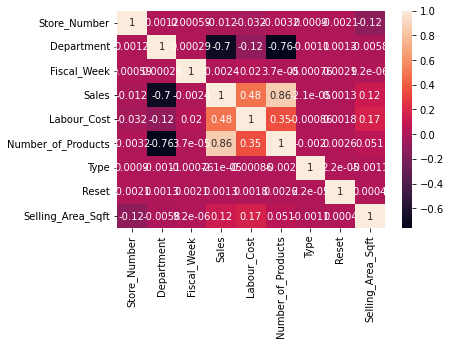

In [321]:
corrMatrix = merged_set.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

* The variable that correlates most with Labour Cost is Sales


## b)	Create two new variables: 

1) Sales per Product (using Sales and Number_of_Products), and 
2) Labour Cost per Product (using Labour_Cost and Number_of_Products). 
    * Which variable is most correlated with Labour Cost per Product (excluding the original labour cost variable and the date-related variables)?


In [325]:
merged_set_grp['Sales Per Product'] = merged_set_grp['Sales']/ merged_set_grp['Number_of_Products']

In [326]:
merged_set_grp['Labour Cost Per Product'] = merged_set_grp['Labour_Cost']/ merged_set_grp['Number_of_Products']

In [327]:
merged_set_grp

Sales  Labour_Cost  \
Store_Number Department Fiscal_Week                           
1            1          1            490983.79     11798.40   
                        2            433221.12     11658.91   
                        3            437758.51     11623.64   
                        4            438017.88     20790.57   
                        5            442416.83     11928.91   
...                                        ...          ...   
463          5          49            26125.11      2487.80   
                        50            36385.17      3110.36   
                        51            37227.91      2920.72   
                        52            50535.33      3304.60   
                        53            35699.45      2443.13   

                                     Number_of_Products      Type     Reset  \
Store_Number Department Fiscal_Week                                           
1            1          1                         36486  1.059483  0.254199   
                        2                         36486  0.888073  1.107717   
                        3                         36486  0.307829  1.284433   
                        4                         36486  0.856435  0.826847   
                        5                         36486  0.739590  0.571993   
...                                                 ...       ...       ...   
463          5          49                         1037  0.478082  0.366274   
                        50                         1037  0.940625  0.712644   
                        51                         1037  0.327948  0.913776   
                        52                         1037  0.492632  0.786874   
                        53                         1037  0.944457  0.474401   

                                     Selling_Area_Sqft  Sales Per Product  \
Store_Number Department Fiscal_Week                                         
1            1          1                      70430.0          13.456772   
                        2                      70430.0          11.873626   
                        3                      70430.0          11.997986   
                        4                      70430.0          12.005095   
                        5                      70430.0          12.125660   
...                                                ...                ...   
463          5          49                     38416.0          25.192970   
                        50                     38416.0          35.086953   
                        51                     38416.0          35.899624   
                        52                     38416.0          48.732237   
                        53                     38416.0          34.425699   

                                     Labour Cost Per Product  
Store_Number Department Fiscal_Week                           
1            1          1                           0.323368  
                        2                           0.319545  
                        3                           0.318578  
                        4                           0.569823  
                        5                           0.326945  
...                                                      ...  
463          5          49                          2.399036  
                        50                          2.999383  
                        51                          2.816509  
                        52                          3.186692  
                        53                          2.355959  

[107874 rows x 8 columns]

In [329]:
merged_set_grp.corr()['Labour Cost Per Product']

Sales                     -0.363841
Labour_Cost                0.388226
Number_of_Products        -0.522677
Type                       0.002576
Reset                      0.000035
Selling_Area_Sqft          0.023490
Sales Per Product          0.581812
Labour Cost Per Product    1.000000
Name: Labour Cost Per Product, dtype: float64

In [330]:
merged_set_grp.corr()['Labour Cost Per Product'].sort_values()

Number_of_Products        -0.522677
Sales                     -0.363841
Reset                      0.000035
Type                       0.002576
Selling_Area_Sqft          0.023490
Labour_Cost                0.388226
Sales Per Product          0.581812
Labour Cost Per Product    1.000000
Name: Labour Cost Per Product, dtype: float64

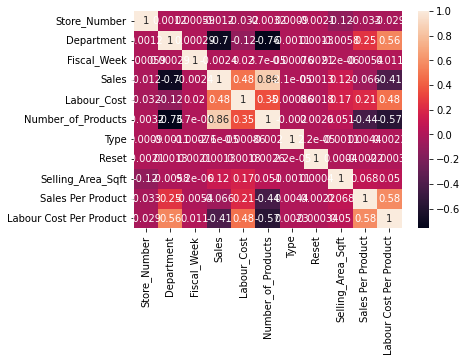

In [331]:
labour_corrMatrix = merged_set.corr()
sn.heatmap(labour_corrMatrix, annot=True)
plt.show()

* sales per product

----

# 8. 8)	Run the given code below to load the merged data and generate a linear regression model where the response variable is the weekly labour cost per product of a specific department within a store

In [299]:
import statsmodels.api as sm
import pickle

X1 = pd.read_pickle('X1.pickle')
Y1 = pd.read_pickle('Y1.pickle')
lm_bad = sm.OLS(Y1, X1)
fit_bad = lm_bad.fit()


In [344]:
fit_bad.rsquared

0.5416217358449286

In [335]:
X1

,const,Selling_Area_Sqft,Department,Sales,Number_of_Products,Type,Reset,sales_per_product,State_FL,State_GA,State_LA,State_MS,Banner_B,Banner_C
0,1.0,35215,1,232563.05,18243,0.085350,0.246156,12.748070,1,0,0,0,0,0
1,1.0,35215,2,62014.97,3099,0.726029,0.541401,20.011284,1,0,0,0,0,0
2,1.0,35215,3,76907.73,972,0.317398,0.391364,79.123179,1,0,0,0,0,0
3,1.0,35215,4,32470.80,1264,0.175648,0.104670,25.688924,1,0,0,0,0,0
4,1.0,35215,5,44257.68,1269,0.867455,0.191448,34.876028,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152390,1.0,38416,1,180502.09,17311,0.700488,0.827438,10.427017,0,0,0,1,0,0
152391,1.0,38416,2,60758.24,2747,0.084686,0.048514,22.118034,0,0,0,1,0,0
152392,1.0,38416,3,95662.06,1026,0.521551,0.149239,93.237875,0,0,0,1,0,0
152393,1.0,38416,4,14541.78,805,0.685589,0.719818,18.064323,0,0,0,1,0,0


In [336]:
X1.groupby('Department').sum()

,const,Selling_Area_Sqft,Sales,Number_of_Products,Type,Reset,sales_per_product,State_FL,State_GA,State_LA,State_MS,Banner_B,Banner_C
Department,,,,,,,,,,,,,
1,30868.0,1012017066,5.192423e+09,488226800,15419.137758,15477.842552,3.240471e+05,23443.0,1875.0,2175.0,450.0,2025.0,2025.0
2,28828.0,952010959,1.507998e+09,80142974,14419.594146,14370.007684,5.386229e+05,22024.0,1462.0,2174.0,449.0,1527.0,2009.0
3,30900.0,1012858350,2.023264e+09,28802475,15545.180277,15389.812492,2.166670e+06,23475.0,1875.0,2175.0,450.0,2025.0,2025.0
4,30900.0,1012858350,6.167254e+08,27665625,15444.160284,15448.392326,6.711555e+05,23475.0,1875.0,2175.0,450.0,2025.0,2025.0
5,30899.0,1012836121,1.014529e+09,32783844,15407.408203,15511.284292,9.416129e+05,23474.0,1875.0,2175.0,450.0,2025.0,2025.0


In [337]:
Y1

0         0.334967
1         0.432120
2         4.730113
3         5.754264
4         2.549165
            ...   
152390    0.198828
152391    0.566178
152392    4.188333
152393    3.669528
152394    2.792035
Name: labour_cost_per_product, Length: 152395, dtype: float64

# a)	What is the unadjusted R squared of this model?

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [339]:
reg1 = LinearRegression().fit(X1, Y1)

In [340]:
reg1.score(X1,Y1)

0.5416217358449283

b)	Look at the structure of the data – the model is poor because considering the real- world meaning of the variables, not all are in the most useful data format (consider the difference between categorical and continuous variables). Correct this issue and re-run the model. What is the unadjusted R squared now? (Do not make any other changes like removing variables etc)
( 
* get rid of states


In [345]:
X1.columns

Index(['const', 'Selling_Area_Sqft', 'Department', 'Sales',
       'Number_of_Products', 'Type', 'Reset', 'sales_per_product', 'State_FL',
       'State_GA', 'State_LA', 'State_MS', 'Banner_B', 'Banner_C'],
      dtype='object')

In [353]:
X1_new = X1.drop(columns=['const','State_FL',
       'State_GA', 'State_LA', 'State_MS', 'Banner_B', 'Banner_C'])

In [354]:
X1_new

,Selling_Area_Sqft,Department,Sales,Number_of_Products,Type,Reset,sales_per_product
0,35215,1,232563.05,18243,0.085350,0.246156,12.748070
1,35215,2,62014.97,3099,0.726029,0.541401,20.011284
2,35215,3,76907.73,972,0.317398,0.391364,79.123179
3,35215,4,32470.80,1264,0.175648,0.104670,25.688924
4,35215,5,44257.68,1269,0.867455,0.191448,34.876028
...,...,...,...,...,...,...,...
152390,38416,1,180502.09,17311,0.700488,0.827438,10.427017
152391,38416,2,60758.24,2747,0.084686,0.048514,22.118034
152392,38416,3,95662.06,1026,0.521551,0.149239,93.237875
152393,38416,4,14541.78,805,0.685589,0.719818,18.064323


In [355]:
lm_better = sm.OLS(Y1, X1_new)
fit_better = lm_better.fit()
fit_better.rsquared

0.7952107387970473

In [356]:
# retry remove product yupe
X1_new = X1.drop(columns=['const','State_FL',
       'State_GA', 'State_LA', 'State_MS', 'Banner_B', 'Banner_C','Type'])
lm_better = sm.OLS(Y1, X1_new)
fit_better = lm_better.fit()
fit_better.rsquared

0.7951583491542185

In [358]:
fit_better.rsquared.round(3)

0.795

#9)	Run the given code below to load the merged data grouped by department and generate a linear regression model where the response variable is the weekly labour cost per product within a store: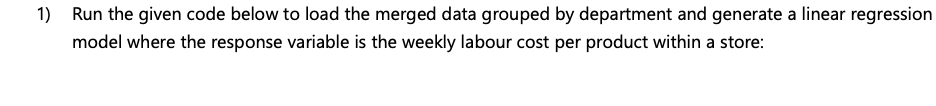

In [360]:
X2 = pd.read_pickle('X2.pickle')
Y2 = pd.read_pickle('Y2.pickle')
lm_bad2 = sm.OLS(Y2, X2)
fit_bad2 = lm_bad2.fit()

# a) 	Considering what you have learned about this data so far, why might we want to remove the independent variable Sales from the regression?


# b) 	Suppose we wanted to remove any numeric variables which are not significant (pval >0.1). How many variables would this remove?

In [362]:
fit_bad2.rsquared

0.3784352425640616

In [363]:
X2

,const,Selling_Area_Sqft,Sales,Number_of_Products,Type,Reset,sales_per_product,State_FL,State_GA,State_LA,State_MS,Banner_B,Banner_C
0,1.0,35215,62014.97,3099,0.697121,0.267635,20.011284,1,0,0,0,0,0
1,1.0,35215,61496.25,3099,0.576927,0.570525,19.843901,1,0,0,0,0,0
2,1.0,35215,57377.07,3099,0.316661,0.368636,18.514705,1,0,0,0,0,0
3,1.0,35215,59034.58,3099,0.036190,0.897966,19.049558,1,0,0,0,0,0
4,1.0,35215,59800.54,3099,0.530464,0.195417,19.296722,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28823,1.0,38416,59678.28,2747,0.676124,0.886349,21.724893,0,0,0,1,0,0
28824,1.0,38416,55844.47,2747,0.674318,0.446109,20.329257,0,0,0,1,0,0
28825,1.0,38416,55859.72,2747,0.595595,0.746517,20.334809,0,0,0,1,0,0
28826,1.0,38416,52139.70,2747,0.473843,0.528146,18.980597,0,0,0,1,0,0


In [364]:
Y2

0        0.432120
1        0.312107
2        0.480374
3        0.386502
4        0.448609
           ...   
28823    0.533324
28824    0.607204
28825    0.593225
28826    0.587961
28827    0.566178
Name: labour_cost_per_product, Length: 28828, dtype: float64

In [372]:
columns = X2.columns
columns

Index(['const', 'Selling_Area_Sqft', 'Sales', 'Number_of_Products', 'Type',
       'Reset', 'sales_per_product', 'State_FL', 'State_GA', 'State_LA',
       'State_MS', 'Banner_B', 'Banner_C'],
      dtype='object')

In [369]:
X2_new = X2.drop(columns=['const'] )

In [370]:
lm_better2 = sm.OLS(Y2, X2_new)
fit_better2 = lm_better2.fit()
fit_better2.rsquared

0.8870912157867855

* definitely remove const

In [377]:

for col in columns:
    X2_new = X2.drop(columns=[col] )
    lm_better2 = sm.OLS(Y2, X2_new)
    fit_better2 = lm_better2.fit()
    

col: const r2: 0.8870912157867855
col: Selling_Area_Sqft r2: 0.37798342698301357
col: Sales r2: 0.3747846542297808
col: Number_of_Products r2: 0.37698236589427625
col: Type r2: 0.37843360649835944
col: Reset r2: 0.3783965273827775
col: sales_per_product r2: 0.37809884775516955
col: State_FL r2: 0.37678380591843397
col: State_GA r2: 0.3771613298327874
col: State_LA r2: 0.3532291110619412
col: State_MS r2: 0.3782936148822921
col: Banner_B r2: 0.37676693739285994
col: Banner_C r2: 0.37255680540175073


* change nt more than 10%, basline is 0.3784352425640616 
---
# 10)	Run the code below to load a clean version of the model (for all questions below use this model)

* By interpreting this model:
a)	What impact on labour cost per product is associated with a unit change in the number of products? (for a single store with all other variables remaining constant) (answer to 2 sig.fig.)
b)	On average, how much higher are labour costs per product expected to be in Florida (“FL”) compared to Mississippi (“MS”)? (for a single store with all other variables remaining constant) (answer to 2 sig.fig.)
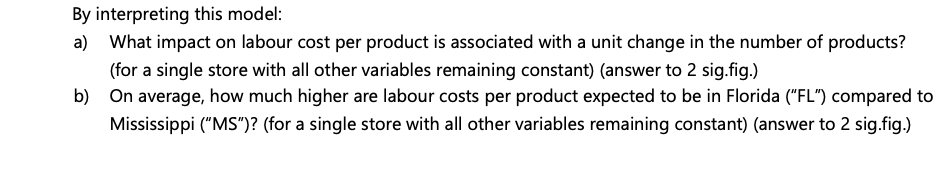

In [390]:
lm_clean = pickle.load(open('lm_clean.sav','rb'))
lm_clean2 = sm.OLS(Y2, X2_new)
fit_clean = lm_clean2.fit()
fit_clean.rsquared

0.37255680540175073

In [393]:
fit_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     labour_cost_per_product   R-squared:                       0.373
Model:                                 OLS   Adj. R-squared:                  0.372
Method:                      Least Squares   F-statistic:                     1555.
Date:                     Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                             19:13:55   Log-Likelihood:                 18678.
No. Observations:                    28828   AIC:                        -3.733e+04
Df Residuals:                        28816   BIC:                        -3.723e+04
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3514      0.032     10.955      0.000       0.289       0.414
Selling_Area_Sqft  -7.548e-07   1.54e-07     -4.901      0.000   -1.06e-06   -4.53e-07
Sales                7.36e-06    5.7e-07     12.918      0.000    6.24e-06    8.48e-06
Number_of_Products    -0.0001   1.17e-05     -8.595      0.000      -0.000   -7.75e-05
Type                   0.0006      0.003      0.221      0.825      -0.005       0.006
Reset                 -0.0035      0.003     -1.361      0.174      -0.009       0.002
sales_per_product     -0.0063      0.002     -3.912      0.000      -0.009      -0.003
State_FL               0.0277      0.003     10.640      0.000       0.023       0.033
State_GA              -0.0337      0.005     -7.477      0.000      -0.043      -0.025
State_LA               0.1305      0.004     34.268      0.000       0.123       0.138
State_MS               0.0169      0.006      2.616      0.009       0.004       0.030
Banner_B              -0.0439      0.004    -10.283      0.000      -0.052      -0.036
==============================================================================
Omnibus:                      452.178   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              888.735
Skew:                          -0.021   Prob(JB):                    1.03e-193
Kurtosis:                       3.859   Cond. No.                     2.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [394]:
fit_clean.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:              OLS                     Adj. R-squared:     0.372      
Dependent Variable: labour_cost_per_product AIC:                -37331.3680
Date:               2021-11-18 19:15        BIC:                -37232.1388
No. Observations:   28828                   Log-Likelihood:     18678.     
Df Model:           11                      F-statistic:        1555.      
Df Residuals:       28816                   Prob (F-statistic): 0.00       
R-squared:          0.373                   Scale:              0.016030   
----------------------------------------------------------------------------
                        Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------------
const                   0.3514    0.0321   10.9546  0.0000   0.2885   0.4143
Selling_Area_Sqft      -0.0000    0.0000   -4.9008  0.0000  -0.0000  -0.0000
Sales                   0.0000    0.0000   12.9177  0.0000   0.0000   0.0000
Number_of_Products     -0.0001    0.0000   -8.5953  0.0000  -0.0001  -0.0001
Type                    0.0006    0.0026    0.2211  0.8250  -0.0045   0.0057
Reset                  -0.0035    0.0026   -1.3608  0.1736  -0.0086   0.0015
sales_per_product      -0.0063    0.0016   -3.9124  0.0001  -0.0095  -0.0032
State_FL                0.0277    0.0026   10.6404  0.0000   0.0226   0.0328
State_GA               -0.0337    0.0045   -7.4773  0.0000  -0.0426  -0.0249
State_LA                0.1305    0.0038   34.2678  0.0000   0.1230   0.1380
State_MS                0.0169    0.0065    2.6157  0.0089   0.0042   0.0296
Banner_B               -0.0439    0.0043  -10.2833  0.0000  -0.0522  -0.0355
---------------------------------------------------------------------------
Omnibus:                452.178          Durbin-Watson:             0.453  
Prob(Omnibus):          0.000            Jarque-Bera (JB):          888.735
Skew:                   -0.021           Prob(JB):                  0.000  
Kurtosis:               3.859            Condition No.:             2757415
===========================================================================
* The condition number is large (3e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [396]:
difference = 0.0277 - (-0.0337)
difference

0.061399999999999996

In [397]:
data_pred = pd.read_pickle("data_pred.pickle")

In [398]:
data_pred

,const,Selling_Area_Sqft,Number_of_Products,sales_per_product,State_FL,State_GA,State_LA,State_MS,Banner_B,Banner_C
0,1.0,35215,3099,20.01,1,0,0,0,0,0
1,1.0,35215,3099,19.84,1,0,0,0,0,0
2,1.0,35215,3099,18.51,1,0,0,0,0,0
3,1.0,35215,3099,19.05,1,0,0,0,0,0
4,1.0,35215,3099,19.30,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
28823,1.0,38416,2747,21.72,0,0,0,1,0,0
28824,1.0,38416,2747,20.33,0,0,0,1,0,0
28825,1.0,38416,2747,20.33,0,0,0,1,0,0
28826,1.0,38416,2747,18.98,0,0,0,1,0,0


In [408]:
FL = data_pred[data_pred['State_FL']==1]
FL = FL.drop(columns=['State_GA','State_LA','State_MS'])

In [411]:
FL[['Banner_B','Banner_C']].value_counts()

Banner_B  Banner_C
0         0           19153
          1            2009
1         0             862
dtype: int64

In [419]:
# banner a is when neither banner b or c
FL_a = FL[FL['Banner_B']==0]
FL_a = FL[FL['Banner_C']==0]

In [418]:
FL_a

,const,Selling_Area_Sqft,Number_of_Products,sales_per_product,State_FL,Banner_B,Banner_C
0,1.0,35215,3099,20.01,1,0,0
1,1.0,35215,3099,19.84,1,0,0
2,1.0,35215,3099,18.51,1,0,0
3,1.0,35215,3099,19.05,1,0,0
4,1.0,35215,3099,19.30,1,0,0
...,...,...,...,...,...,...,...
28748,1.0,30727,2613,16.02,1,0,0
28749,1.0,30727,2613,16.03,1,0,0
28750,1.0,30727,2613,16.43,1,0,0
28751,1.0,30727,2613,16.12,1,0,0


In [417]:
fit_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     labour_cost_per_product   R-squared:                       0.375
Model:                                 OLS   Adj. R-squared:                  0.375
Method:                      Least Squares   F-statistic:                     1919.
Date:                     Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                             19:23:30   Log-Likelihood:                 18728.
No. Observations:                    28828   AIC:                        -3.744e+04
Df Residuals:                        28818   BIC:                        -3.735e+04
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0557      0.011     -5.123      0.000      -0.077      -0.034
Selling_Area_Sqft  -7.948e-07   1.54e-07     -5.174      0.000    -1.1e-06   -4.94e-07
Number_of_Products  4.455e-05   4.43e-06     10.064      0.000    3.59e-05    5.32e-05
sales_per_product      0.0145      0.000    100.255      0.000       0.014       0.015
State_FL               0.0219      0.003      8.363      0.000       0.017       0.027
State_GA              -0.0259      0.004     -5.811      0.000      -0.035      -0.017
State_LA               0.1343      0.004     35.481      0.000       0.127       0.142
State_MS               0.0157      0.006      2.428      0.015       0.003       0.028
Banner_B              -0.0342      0.004     -8.000      0.000      -0.043      -0.026
Banner_C               0.0489      0.003     16.437      0.000       0.043       0.055
==============================================================================
Omnibus:                      403.551   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.847
Skew:                           0.016   Prob(JB):                    3.69e-166
Kurtosis:                       3.796   Cond. No.                     5.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lm_clean = pickle.load(open('lm_clean.sav','rb'))
lm_clean2 = sm.OLS(Y2, X2_new)
fit_clean = lm_clean2.fit()
fit_clean.rsquared

In [420]:
fit_clean.predict()

array([0.36616804, 0.36370465, 0.34443228, ..., 0.34636775, 0.32680557,
       0.37230575])

In [424]:
predict_x = {'Selling_Area_Sqft':40660 , 'Number_of_Products':2852 , 'sales_per_product':21.44}

In [425]:
fit_clean.predict(predict_x)

ValueError: shapes (1,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)

In [428]:
40660*-7.948e-07 + 4.455e-05*2852 + 21.44*0.0145

0.4056200320000001